[Adult income dataset](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

In [1]:
import pandas as pd
adultData=pd.read_csv("adult.csv")

In [2]:
adultData.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [96]:
import numpy as np

X=adultData.drop(["income"],axis=1).values
Y=np.array(adultData.income)

In [125]:
#print(X[0:5])


changeList=[1,3,5,6,7,8,9,13]

for c in changeList:
    unique_values = np.unique(X[:,c])
    label_dict = {value: index for index, value in enumerate(unique_values)}
    X[:,c] = np.vectorize(label_dict.get)(X[:,c])


#Y[Y[:,0]=='<=50K',0]=0
#Y[Y[:,0]=='>50K',0]=1
Y=np.where(Y == '<=50K', 0, 1)



#print(set(X[:,1]))
print(X[0:5])
print(Y)

[[25 4 226802 1 7 4 7 3 2 1 0 0 40 39]
 [38 4 89814 11 9 2 5 0 4 1 0 0 50 39]
 [28 2 336951 7 12 2 11 0 4 1 0 0 40 39]
 [44 4 160323 15 10 2 7 0 2 1 7688 0 40 39]
 [18 0 103497 15 10 4 0 3 4 0 0 0 30 39]]
[0 0 1 ... 0 0 1]


In [98]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [108]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy=[]
testing_accuracy=[]
n_neighbors_setting=range(1,100)

for n in n_neighbors_setting:
    KNN_Object=KNeighborsClassifier(n)
    KNN_Object.fit(X_train, Y_train)
    training_accuracy.append(KNN_Object.score(X_train, Y_train))
    testing_accuracy.append(KNN_Object.score(X_test, Y_test))

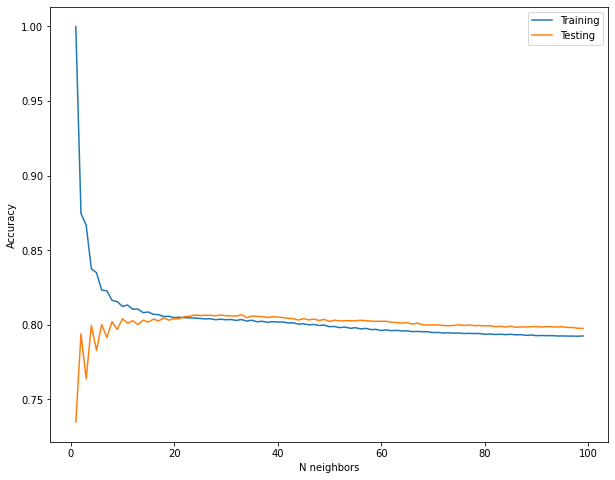

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(n_neighbors_setting, training_accuracy, label="Training")
plt.plot(n_neighbors_setting, testing_accuracy, label="Testing")
plt.xlabel("N neighbors")
plt.ylabel("Accuracy")
plt.legend(loc="upper right")
plt.show()

In [141]:
print(f"Best accuracy {max(testing_accuracy)} at n_neighbor={testing_accuracy.index(max(testing_accuracy))+1}")

Best accuracy 0.8068379568021292 at n_neighbor=33
